In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162724 sha256=4d08e99c473b59ab22ba435dc9e5f0ef7c6f65c5275c8f0593377e4e483ba6f6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


**Surprise 를 이용한 추천 시스템 구축**

- Surprise는 주로 협업 필터링(collaborative filtering)을 기반으로 한 추천 시스템을 구현하는 데 사용됨


In [2]:
# Surprise 패키지 사용법
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [3]:
data = Dataset.load_builtin('ml-100k')
# 수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


> surprise는 자체적으로 로우 레벨의 데이터를 칼럼 레벨의 데이터로 변경하기에, 원본인 로우 레벨의 사용자 - 아이템 평점 데이터를 데이터 세트로 적용해야함

> test() vs predict

- test() : 사용자 아이템 평점 데이터 세트 전체에 대해서 추천을 예측하는 메서드 => 입력된 데이터 set에 대해 추천 data set을 만들어줌
- predict() : 개별 사용자와 영화에 대한 추천 평점을 반환해줌

In [4]:
# test()
algo = SVD(random_state = 0)
algo.fit(trainset)

In [5]:
predictions = algo.test(testset)
print('prediction type : ', type(predictions), 'size : ', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

# 호출 결과 : prediction 객체 -> est : surprise의 추천 예측 평점 data를 tuple 형태로 가지고 있음
# 'was_impossible': True => 내부 처리 시 추천 에측을 할 수 없는 경우에 로그용으로 data를 남기는 데 사용됨

prediction type :  <class 'list'> size :  25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.5114147666251547, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.573872419581491, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.033583485472447, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.8463639495936905, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.1807542478219157, details={'was_impossible': False})]

In [6]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

[('120', '282', 3.5114147666251547),
 ('882', '291', 3.573872419581491),
 ('535', '507', 4.033583485472447)]

In [7]:
# Predict() : 사용자 id, item id를 입력해주면 추천 예측 평점(est)을 포함한 정보 반환
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함.
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.49   {'was_impossible': False}


> - **test 메서드는 입력 데이터 세트의 모든 사용자와 아이템 아이디에 대해서 predict를 반복적으로 수행한 결과하고 생각하면 된다.**
-  Surprise 패키지에서 반환된 prediction 객체의 r_ui는 실제 평가 값(정답 값)을 나타내며, est는 해당 예측에 대한 예측 점수를 나타낸다

- Surprise의 SVD(Singular Value Decomposition) 알고리즘은 기본적으로 사용자-아이템 평점 행렬을 분해하여 잠재 요인을 추출하고, 이를 기반으로 예측을 수행합니다. 이 때, 모델은 학습 데이터의 모든 사용자와 아이템을 고려하여 잠재 요인을 학습합니다. 모델이 어떤 값을 예측해야 하는지에 대해서는 다음과 같은 방식으로 알 수 있습니다:

1. **잠재 요인 분해**: SVD는 학습 데이터를 통해 잠재 요인을 추출하는 과정을 거칩니다. 이 과정에서 사용자-아이템 평점 행렬이 잠재 요인의 곱으로 분해됩니다.

2. **추가적인 정보**: SVD는 사용자와 아이템에 대한 추가적인 정보를 고려하지 않고, 오직 평점 정보만을 이용하여 예측을 수행합니다. 이는 잠재 요인 모델의 기본 가정 중 하나입니다.

3. **평가 데이터**: 학습이 완료된 모델은 평가 데이터(테스트 데이터)에 대해 예측을 수행합니다. 이 때, 모델은 테스트 데이터의 사용자-아이템 쌍에 대한 예측값을 계산하여 반환합니다.

- 따라서 모델은 학습 데이터를 기반으로 잠재 요인을 추출하고, 이를 사용하여 테스트 데이터에 대한 예측을 수행합니다.

> test data를 이용하여 추천 예측 평점과 실제 평점과의 차이를 평가

In [8]:
accuracy.rmse(predictions)

RMSE: 0.9467


0.9466860806937948

### Surprise 주요 모듈 소개

**- data set**
- surprise는 userid, itemid, rating data가 로우 레벨로 된 data set에만 적용 가능
- data의 1번째, 2번째, 3번째 칼럼을 각각 사용자, 아이템아이디, 평점으로 가정하고 3번재 칼럼까지만 data를 로딩하고 4번째 칼럼부터는 아예 읽어오지를 않는다.

- 무비렌즈 아카이브 서버에서 자동으로 받는 데이터 파일 뿐만 아니라 판다스 dataframe에서도 로딩가능하나, 꼭 data set의 칼럼 순서가 사용자 아이디, 아이템 아이디, 평점순으로 되어있어야 한다.

In [9]:
# OS(Operating System 운영체제 파일)에서 데이터를 Surprise data set으로 로딩
# 중요한 것이 원래 data file에서 column명을 헤더로 가지고 있다면 헤더를 삭제해줘야해 한다.
import pandas as pd
ratings = pd.read_csv("/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/ml-latest-small/ratings.csv")
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.
ratings.to_csv("/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/ml-latest-small/ratings_noh.csv", index = False , header = False)

In [10]:
# ratings_nohc.csv 파일은 ','로 구분되어 있고, 4개의 칼럼이 사용자 아이디, 아이템 아이디, 평점, 타임스탬프임을 로딩할 떄 알려줘야 한다.
from surprise import Reader

reader = Reader(line_format = 'user item rating timestamp', sep = ',', rating_scale = (0.5, 5))
data = Dataset.load_from_file('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/ml-latest-small/ratings_noh.csv', reader = reader)

> Surprise 패키지에서 제공하는 Reader 클래스를 사용하여 데이터를 읽어오고, 그 데이터를 Surprise의 Dataset 객체로 변환하는 과정을 수행합니다.
1. `reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))`: Reader 객체를 생성합니다. 여기서는 다음과 같은 매개변수를 사용하여 Reader를 초기화합니다:
   - `line_format`: 데이터 파일의 각 줄의 형식을 지정합니다. 여기서는 'user item rating timestamp'로 사용자, 아이템, 평점, 타임스탬프 순서로 데이터가 구성되어 있다는 것을 나타냅니다.
   - `sep`: 데이터 파일에서 각 필드를 구분하는 구분자를 지정합니다. 이 경우에는 쉼표(,)로 구분됩니다.
   - `rating_scale`: 평점의 최소 및 최대 값 범위를 지정합니다. 여기서는 평점이 0.5에서 5까지의 값을 가질 수 있다는 것을 나타냅니다.
2. `data=Dataset.load_from_file('./ml-latest-small/ratings_noh.csv',reader=reader)`: 지정된 Reader 객체를 사용하여 데이터 파일을 읽어와서 Surprise의 Dataset 객체로 변환합니다. 이 때, `load_from_file` 함수를 사용하고, 데이터 파일의 경로와 Reader 객체를 전달합니다.

In [11]:
# SVD 행렬 분해 기법을 이용해 추천 예측
trainset, testset = train_test_split(data, test_size= 0.25, random_state=0)
# 수행시마다 동일한 결과 도출을 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### Pandas DataFrame에서 Surprise data set loading하기

In [12]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/ml-latest-small/ratings.csv')
reader = Reader(rating_scale = (0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 0)

algo = SVD(n_factors = 50, random_state = 0)
algo.fit(trainset)
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

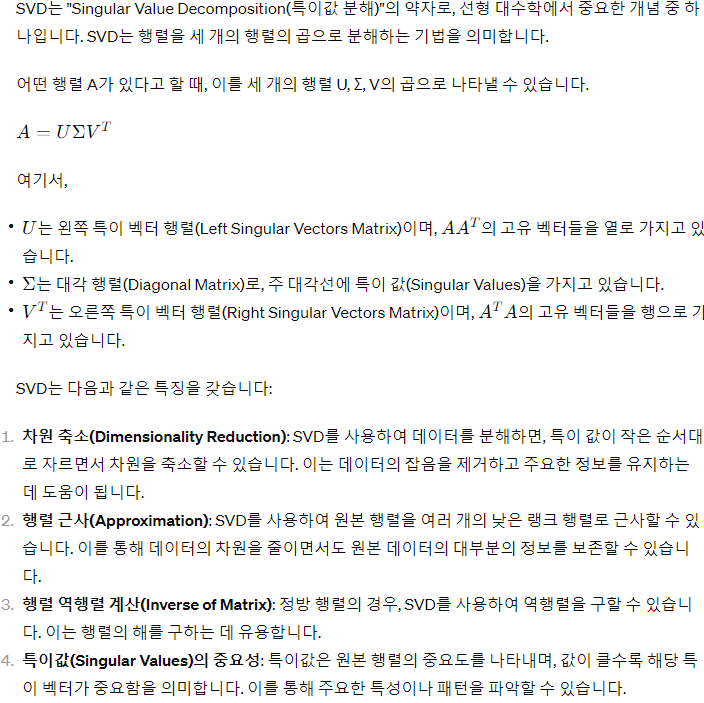

> SVD의 경우 Null 값이 없는 경우에만 가능해서, 주로 SGD or ALS SVD를 이용

> **biased 파라미터** : 베이스라인 사용자 편향 적용 여부
- baseline : 각 개인이 평점을 부여하는 성향을 반영해 평점을 계산하는 방식
- 보통의 baseline 평점 : 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수 공식

Surprise의 SVD 클래스에서 biased 파라미터는 모델의 편향(bias)을 포함할지 여부를 결정하는 매개변수입니다. 이 매개변수는 모델이 사용자와 아이템 간의 상호 작용을 예측할 때 고려해야 할 추가적인 요소를 제어합니다.

biased 매개변수의 값에 따라 두 가지 상황이 있습니다:

1. biased=True:
   - 이 경우 모델은 사용자나 아이템의 평균 평가를 고려하여 예측을 수행합니다.
   - 사용자나 아이템의 평균 평가를 고려함으로써, 해당 사용자나 아이템의 특성을 반영하고 예측을 개선할 수 있습니다.
   - 따라서 모델은 개별 사용자나 아이템의 편향을 고려하여 예측을 수행합니다.

2. biased=False:
   - 이 경우 모델은 사용자와 아이템 간의 상호 작용만을 고려하여 예측을 수행하고, 추가적인 평균 평가를 고려하지 않습니다.
   - 모델이 좀 더 단순화되고 편향이 제거되며, 데이터에 더 일반화된 모델이 될 수 있습니다.
   - 하지만 때로는 개별 사용자나 아이템의 특성을 고려하지 않는 것이 예측의 정확도를 낮출 수 있습니다.

## 교차 검증과 하이퍼 파라미터 튜닝

In [13]:
# cross_validate
from surprise.model_selection import cross_validate

# 판다스 DataFrame에서 Surprise 데이터 세트로 데이터 로딩
ratings = pd.read_csv("/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/ml-latest-small/ratings.csv") # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state = 0)
cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8763  0.8717  0.8683  0.8730  0.8683  0.8715  0.0030  
MAE (testset)     0.6725  0.6721  0.6659  0.6703  0.6682  0.6698  0.0025  
Fit time          3.93    1.53    1.58    1.53    1.56    2.02    0.95    
Test time         0.12    0.28    0.11    0.27    0.12    0.18    0.08    


{'test_rmse': array([0.87632098, 0.87174749, 0.86832661, 0.87300877, 0.86825102]),
 'test_mae': array([0.67253741, 0.67210086, 0.66589522, 0.67027323, 0.66820393]),
 'fit_time': (3.9295718669891357,
  1.526669979095459,
  1.5760231018066406,
  1.5265958309173584,
  1.5617234706878662),
 'test_time': (0.11569762229919434,
  0.2772555351257324,
  0.11391234397888184,
  0.2741682529449463,
  0.12386918067932129)}

In [14]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터를 딕셔너리 형태로 지정.
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개의 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8762099291272909
{'n_epochs': 20, 'n_factors': 50}


## Surprise 를 이용한 잠재 요인 협업 필터링 기반 개인화 영화 추천 시스템 구축

- 이전까지는 전부 평가 결과가 있었던 data들에 대해 평가 점수 예측을 진행
- 지금부터는 surprise 패키지로 학습된 추천 알고리즘을 기반으로 특정 사용자가 아직 평점을 매기지 않은 영화 중  개인 취향에 적절한 영화를 추천

In [16]:
# train_test_split( )으로 분리하지 않고 데이터 세트에 fit( )을 호출해서 오류가 발생하는 코드
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

In [17]:
# dataset 전체를 학습 data로 사용하려면 DatasetAutoFolds 클래스를 이용하면 됨
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format = 'user item rating timestamp', sep = ',', rating_scale = (0.5,5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성
data_folds = DatasetAutoFolds(ratings_file = "/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/ml-latest-small/ratings_noh.csv", reader = reader)

#전체 데이터를 학습데이터로 생성함.
trainset = data_folds.build_full_trainset()

In [18]:
algo = SVD(n_epochs = 20, n_factors = 50, random_state = 0)
algo.fit(trainset)

In [19]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv("/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/ml-latest-small/movies.csv")

# userId=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인.
movieIds = ratings[ratings['userId'] == 9]['movieId']
if movieIds[movieIds == 42].count() == 0:
  print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [20]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


-> 사용자가 평점을 매기지 않은 영화의 추천 예측 평점을 구해보았음

In [21]:
# 특정 사용자에게 사용자가 아직 보지 않은 영화를 추천하기 위해 아직 보지 않은 영화 목록 확인
# 사용자가 평점을 매기지 않은 영화의 추천 예측 평점을 모두 구한 후, 예측 평점 순으로 영화를 추천

def get_unseen_surprise(ratings, movies, userId):
    # 입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()

    # 모든 영화들의 movieId를 리스트로 생성.
    total_movies = movies['movieId'].tolist()

    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), '전체 영화 수:',len(total_movies))

    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


In [22]:
# 학습이 완료된 추천알고리즘 객체, 추천 대상 사용자 아이디, 아직 안 본 영화 리스트, 추천 개수를 입력값으로 전달
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]

    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est

    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions = predictions[:top_n]

    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    # Pandas 라이브러리에서 제공하는 메서드 ;  Series나 DataFrame 객체에서 특정 값이 포함되어 있는지 여부를 확인하는 데 사용
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]

    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122657
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957


- `sort()` 메서드의 `key` 매개변수에 함수를 전달하면 해당 함수의 반환값을 기준으로 리스트를 정렬합니다. 이 때, 정렬의 기준이 되는 값은 함수가 각 요소에 대해 반환하는 값이며, 이를 기준으로 리스트가 정렬됩니다.

- 위의 코드에서 `sortkey_est()` 함수는 예측 결과(`Prediction` 객체)를 받아 해당 예측의 평점(`est`) 값을 반환하는 함수입니다. 이 함수를 `key` 매개변수로 사용하여 `predictions` 리스트를 `est` 값으로 내림차순 정렬합니다. 이렇게 함으로써 예측값이 가장 높은 영화를 먼저 추천할 수 있습니다.

- 따라서 `predictions.sort(key=sortkey_est, reverse=True)` 구문은 예측값이 높은 순서대로 `predictions` 리스트를 정렬하는 것을 의미합니다. 이해하신 대로 함수를 사용한 정렬 기능을 활용하여 코드를 효율적으로 작성한 것입니다.

**추가 설명:**
만약 `sort()` 메서드의 `key` 매개변수를 사용하지 않고 단순히 `predictions.sort(reverse=True)`와 같이 정렬했다면, 리스트의 각 요소가 직접 비교되어 정렬될 것입니다. 이 경우 `Prediction` 객체의 속성 중에서 비교 기준이 될 값이 명확하지 않으므로 정확한 정렬 결과를 얻을 수 없을 것입니다. 따라서 함수를 사용하여 정렬 기준을 명시적으로 지정하는 것이 중요합니다.